In [ ]:
cd  /content/drive/MyDrive/AI-assigment

In [11]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)


2.4.1


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
data = pd.read_csv('/content/drive/MyDrive/AI-assigment/creditcard.csv')

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
data.shape

(284807, 31)

In [16]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
non_fraud = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [20]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [21]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [22]:
final_data = fraud.append(non_fraud, ignore_index=True)
final_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [23]:
final_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [24]:
X = final_data.drop('Class', axis=1)
y = final_data['Class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [26]:
X_train.shape, X_test.shape

((688, 30), (296, 30))

In [27]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
633,130281.0,-0.592396,0.662578,1.484573,-0.597332,-0.189628,-0.409632,0.426505,-0.092017,0.660388,-0.782393,-1.148615,0.258948,0.364688,-0.437934,-0.001661,0.003058,-0.629215,0.348794,-0.392644,-0.190902,0.364297,1.192305,-0.311467,0.095437,-0.228414,-0.236557,-0.052411,0.165596,24.95
662,73181.0,1.256299,0.318222,0.293469,0.697070,-0.413623,-1.082054,0.052867,-0.175203,0.108284,-0.268033,-0.155851,-0.031710,-0.271264,-0.188694,1.148992,0.503458,0.021245,-0.236328,-0.193025,-0.112489,-0.293683,-0.871704,0.134665,0.326176,0.199956,0.096416,-0.026337,0.029699,1.79
510,83324.0,-2.676982,1.135599,-0.872782,-1.146228,-1.739622,0.468753,-2.973810,-7.618580,-1.776426,-1.429459,-1.629911,-0.082445,-1.838704,1.657475,-0.817252,-0.860465,0.656354,0.994491,-1.526751,0.952816,-4.212562,0.712399,0.323699,0.382461,-0.902360,0.800524,0.420778,-0.024214,163.31
68,26961.0,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,-8.511767,5.138547,-7.220020,0.615793,-7.327222,-0.038632,-6.331515,-12.688858,-4.847382,1.020536,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99
294,93823.0,-3.821939,5.667247,-9.244963,8.246147,-4.368286,-3.450735,-8.427378,2.305609,-5.338079,-12.011161,8.621255,-18.683715,-0.962073,-15.297656,-2.414132,-12.105602,-21.338195,-8.045436,0.156015,1.115247,1.990520,0.083353,-0.062264,0.390188,0.329884,0.098017,1.869570,1.000850,75.86


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# We will not only transform the X_test because it avoids overfitting 
# This means we are transforming X_test based on the findings of X_train
X_test = scaler.transform(X_test)

In [29]:
y_train = y_train.to_numpy()

In [30]:
y_test = y_test.to_numpy()

In [31]:
X_train.shape

(688, 30)

In [32]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train.shape, X_test.shape

In [33]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2)) # dropout 20% of neurons

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten()) # Flatten our 3D data into a vector
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [35]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
22/22 [==============================] - 2s 31ms/step - loss: 0.8800 - accuracy: 0.5855 - val_loss: 0.6160 - val_accuracy: 0.8142
Epoch 2/20
22/22 [==============================] - 0s 10ms/step - loss: 0.4907 - accuracy: 0.7948 - val_loss: 0.5701 - val_accuracy: 0.8074
Epoch 3/20
22/22 [==============================] - 0s 10ms/step - loss: 0.4380 - accuracy: 0.8345 - val_loss: 0.5418 - val_accuracy: 0.8547
Epoch 4/20
22/22 [==============================] - 0s 10ms/step - loss: 0.3599 - accuracy: 0.8643 - val_loss: 0.5128 - val_accuracy: 0.8750
Epoch 5/20
22/22 [==============================] - 0s 10ms/step - loss: 0.2942 - accuracy: 0.8862 - val_loss: 0.4869 - val_accuracy: 0.8953
Epoch 6/20
22/22 [==============================] - 0s 10ms/step - loss: 0.2745 - accuracy: 0.8881 - val_loss: 0.4598 - val_accuracy: 0.8986
Epoch 7/20
22/22 [==============================] - 0s 11ms/step - loss: 0.2815 - accuracy: 0.8855 - val_loss: 0.4311 - val_accuracy: 0.9054
Epoch 8/20
22

In [57]:
def plot_learningCurve(history, epoch):
  # plot training  validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

  # plot training & valiation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show() 

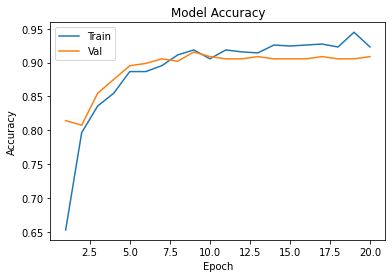

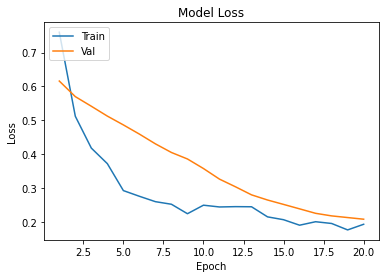

In [58]:
plot_learningCurve(history, epochs)

In [ ]:

epochs = 100
model = Sequential()
model.add(Conv1D(10, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2)) # dropout 20% of neurons

model.add(Conv1D(8, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten()) # Flatten our 3D data into a vector
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

Epoch 1/20
22/22 [==============================] - 1s 20ms/step - loss: 0.2063 - accuracy: 0.9261 - val_loss: 0.2077 - val_accuracy: 0.9088
Epoch 2/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1552 - accuracy: 0.9431 - val_loss: 0.2053 - val_accuracy: 0.9054
Epoch 3/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1797 - accuracy: 0.9394 - val_loss: 0.2039 - val_accuracy: 0.9054
Epoch 4/20
22/22 [==============================] - 0s 11ms/step - loss: 0.1660 - accuracy: 0.9465 - val_loss: 0.2035 - val_accuracy: 0.9088
Epoch 5/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1345 - accuracy: 0.9521 - val_loss: 0.2022 - val_accuracy: 0.9054
Epoch 6/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1431 - accuracy: 0.9518 - val_loss: 0.2007 - val_accuracy: 0.9088
Epoch 7/20
22/22 [==============================] - 0s 11ms/step - loss: 0.1273 - accuracy: 0.9569 - val_loss: 0.1984 - val_accuracy: 0.9020
Epoch 8/20
22

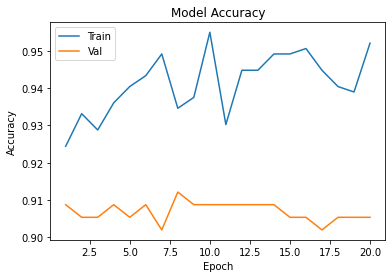

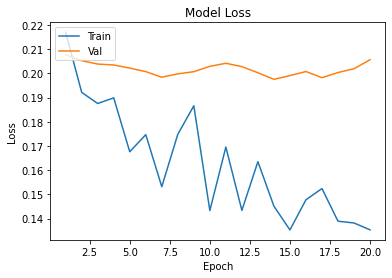

In [59]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

In [ ]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2)) # dropout 20% of neurons

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten()) # Flatten our 3D data into a vector
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

Epoch 1/20
22/22 [==============================] - 1s 19ms/step - loss: 0.1439 - accuracy: 0.9489 - val_loss: 0.2074 - val_accuracy: 0.9054
Epoch 2/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1521 - accuracy: 0.9466 - val_loss: 0.2034 - val_accuracy: 0.9054
Epoch 3/20
22/22 [==============================] - 0s 11ms/step - loss: 0.1573 - accuracy: 0.9523 - val_loss: 0.2078 - val_accuracy: 0.9088
Epoch 4/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1384 - accuracy: 0.9523 - val_loss: 0.2036 - val_accuracy: 0.9054
Epoch 5/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1195 - accuracy: 0.9590 - val_loss: 0.2045 - val_accuracy: 0.9020
Epoch 6/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1179 - accuracy: 0.9608 - val_loss: 0.2033 - val_accuracy: 0.8986
Epoch 7/20
22/22 [==============================] - 0s 11ms/step - loss: 0.1397 - accuracy: 0.9437 - val_loss: 0.2074 - val_accuracy: 0.9054
Epoch 8/20
22

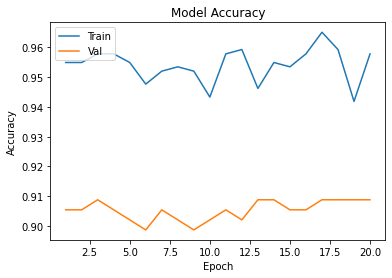

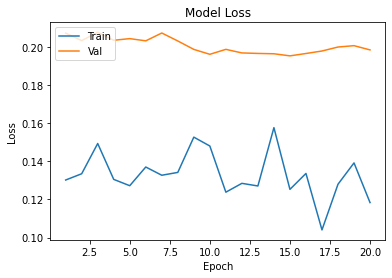

In [60]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

Epoch 1/20
22/22 [==============================] - 1s 20ms/step - loss: 0.1470 - accuracy: 0.9503 - val_loss: 0.2003 - val_accuracy: 0.9088
Epoch 2/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1157 - accuracy: 0.9584 - val_loss: 0.2010 - val_accuracy: 0.9088
Epoch 3/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0926 - accuracy: 0.9616 - val_loss: 0.2018 - val_accuracy: 0.9088
Epoch 4/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0835 - accuracy: 0.9639 - val_loss: 0.2031 - val_accuracy: 0.9088
Epoch 5/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1187 - accuracy: 0.9668 - val_loss: 0.2063 - val_accuracy: 0.9088
Epoch 6/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1233 - accuracy: 0.9543 - val_loss: 0.2007 - val_accuracy: 0.9088
Epoch 7/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0990 - accuracy: 0.9669 - val_loss: 0.1970 - val_accuracy: 0.9122
Epoch 8/20
22

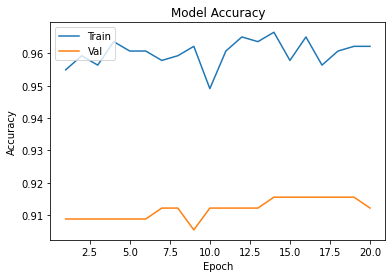

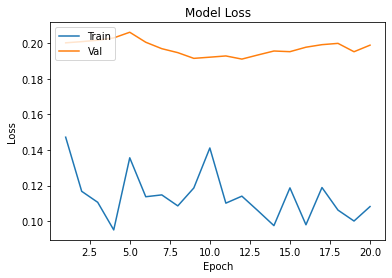

In [61]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

In [ ]:
y_pred = model.predict(X_test)

In [62]:
testing = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9122


In [64]:
predictions = model.predict(X_test)
predictions = predictions.flatten()

In [65]:
predictions

array([1.88447326e-01, 2.91970372e-02, 9.99998450e-01, 6.46655560e-02,
       1.00000000e+00, 6.89473748e-03, 9.20158029e-01, 4.33453023e-02,
       6.25792146e-03, 9.99963164e-01, 7.38766789e-03, 1.19962811e-01,
       1.00000000e+00, 3.24076653e-01, 1.00000000e+00, 9.99875128e-01,
       1.00000000e+00, 1.25908852e-03, 1.00000000e+00, 1.00000000e+00,
       9.92591143e-01, 5.83477020e-02, 1.00000000e+00, 2.60922313e-03,
       1.69182867e-01, 4.35760617e-03, 5.59807718e-02, 1.00000000e+00,
       2.46967971e-02, 2.60978043e-02, 9.95372534e-01, 9.99824762e-01,
       1.54278576e-02, 2.81688571e-03, 2.85455585e-03, 4.82085586e-01,
       2.55025625e-02, 9.99992311e-01, 1.41057372e-02, 9.99999702e-01,
       6.23863161e-01, 1.00000000e+00, 2.98161805e-02, 9.99993622e-01,
       1.00000000e+00, 2.75969505e-04, 3.87289375e-01, 3.80673409e-02,
       2.67054558e-01, 9.99999762e-01, 1.00000000e+00, 9.99901831e-01,
       9.99998271e-01, 1.00000000e+00, 4.27746773e-03, 2.26234496e-02,
      

In [66]:
testing = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9122


# New Section